In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Bank Previous Data/bank-previousData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Customer   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

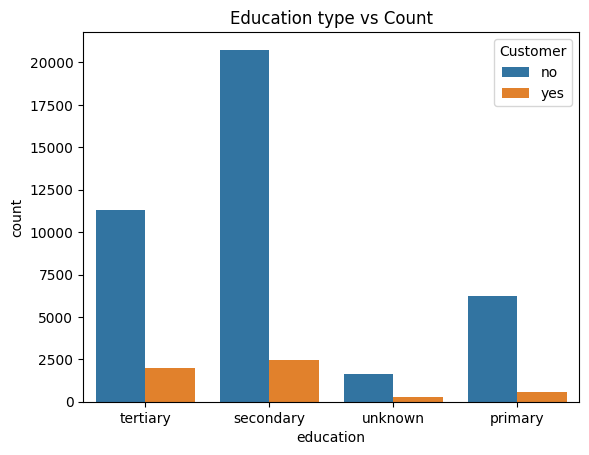

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

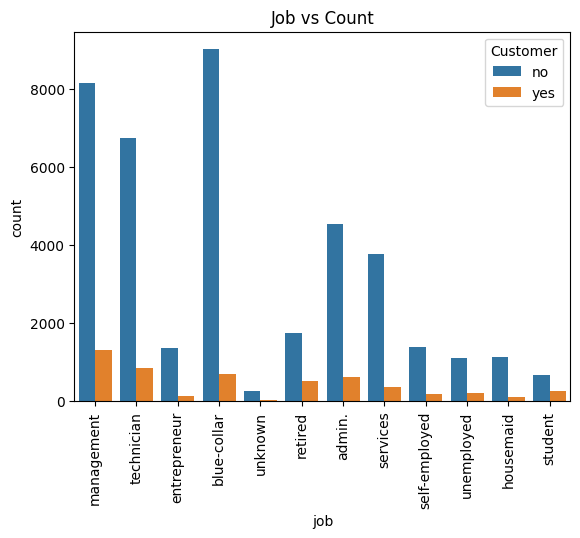

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

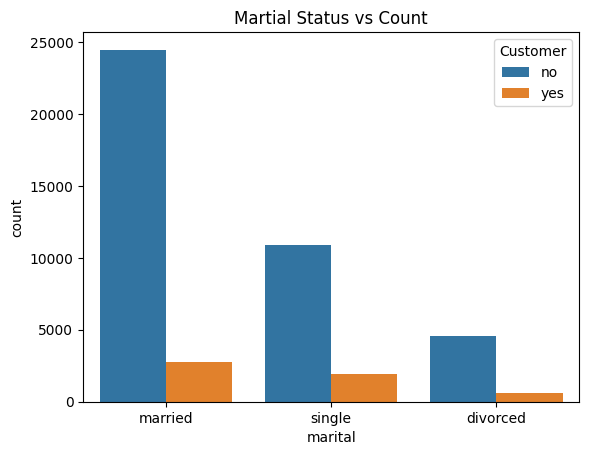

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

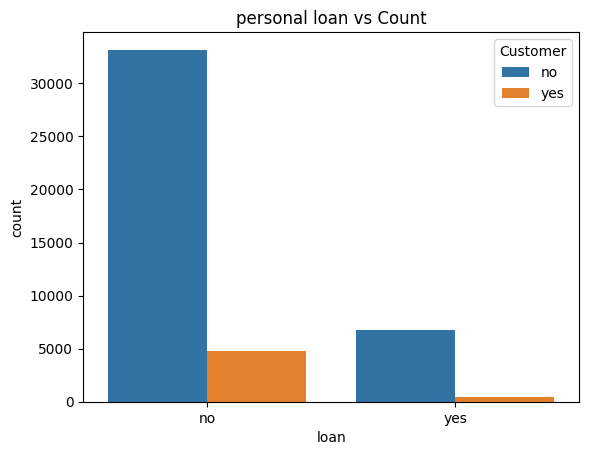

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

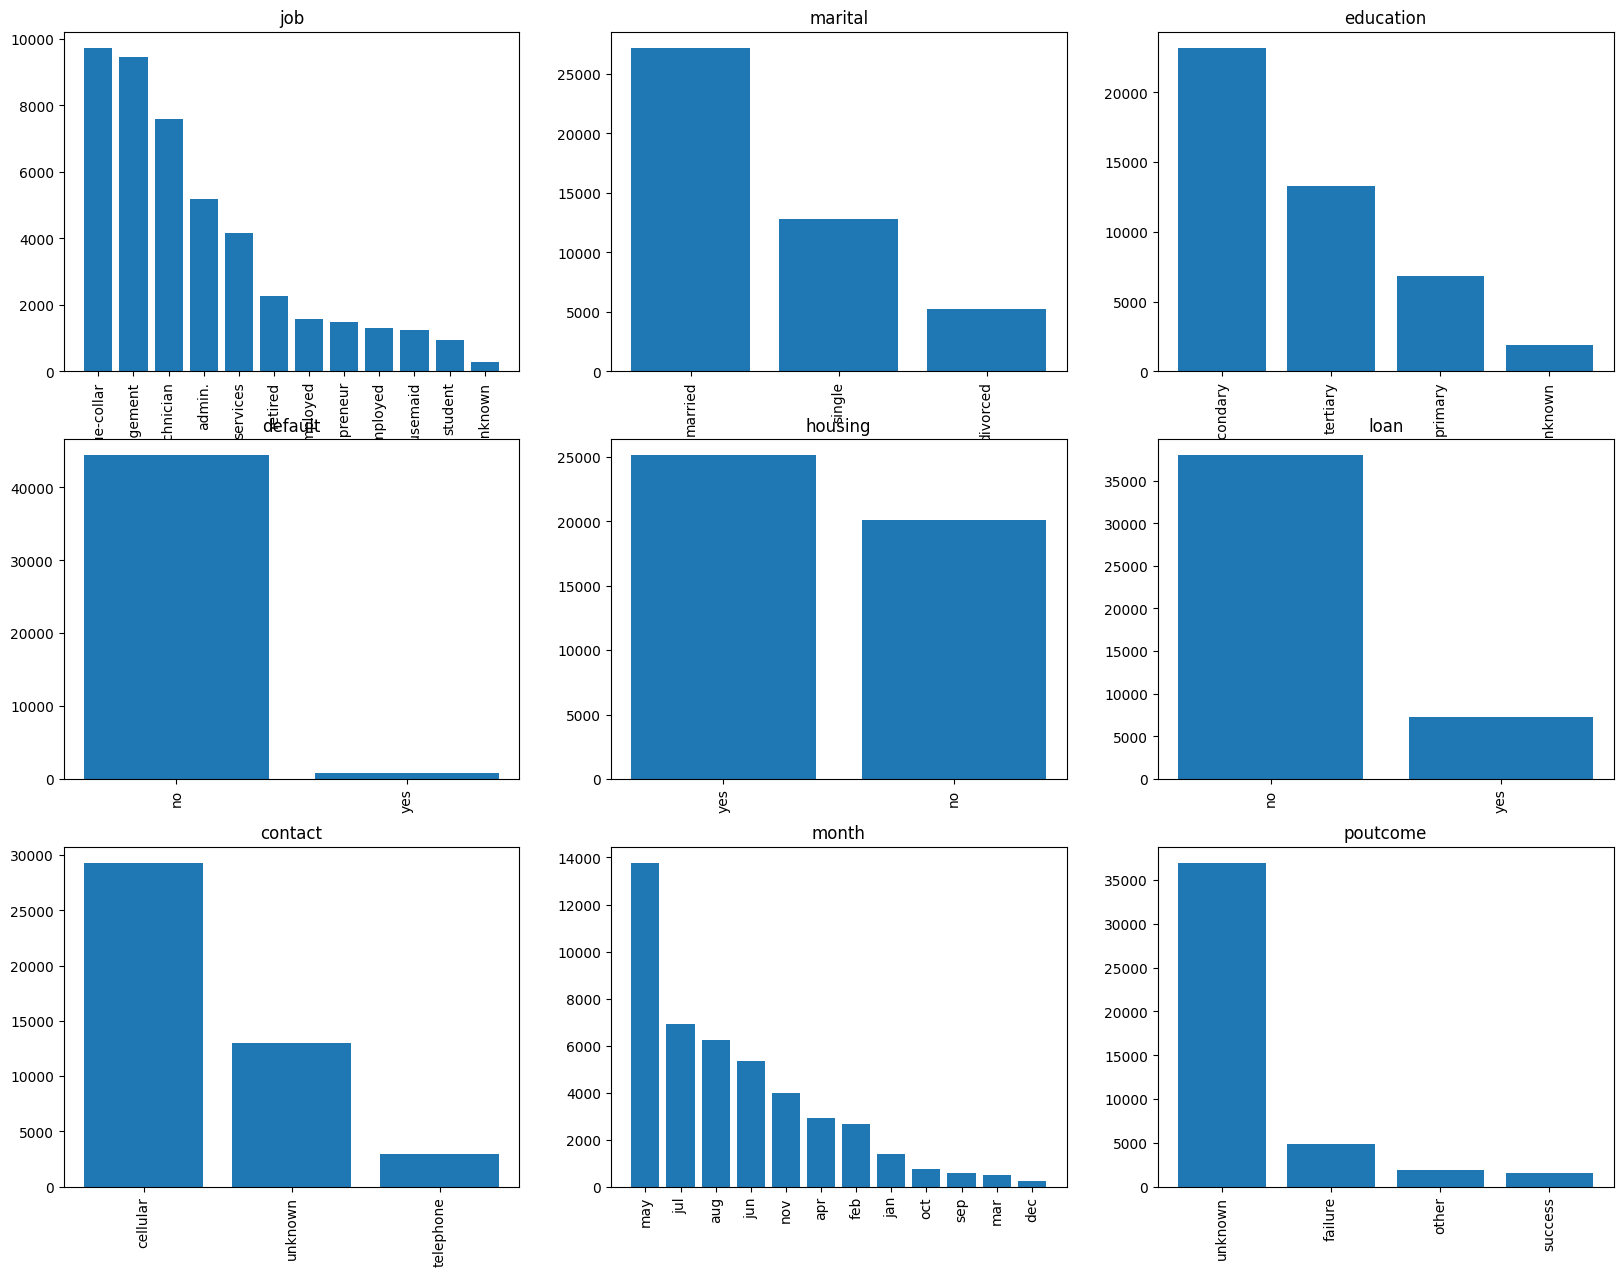

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

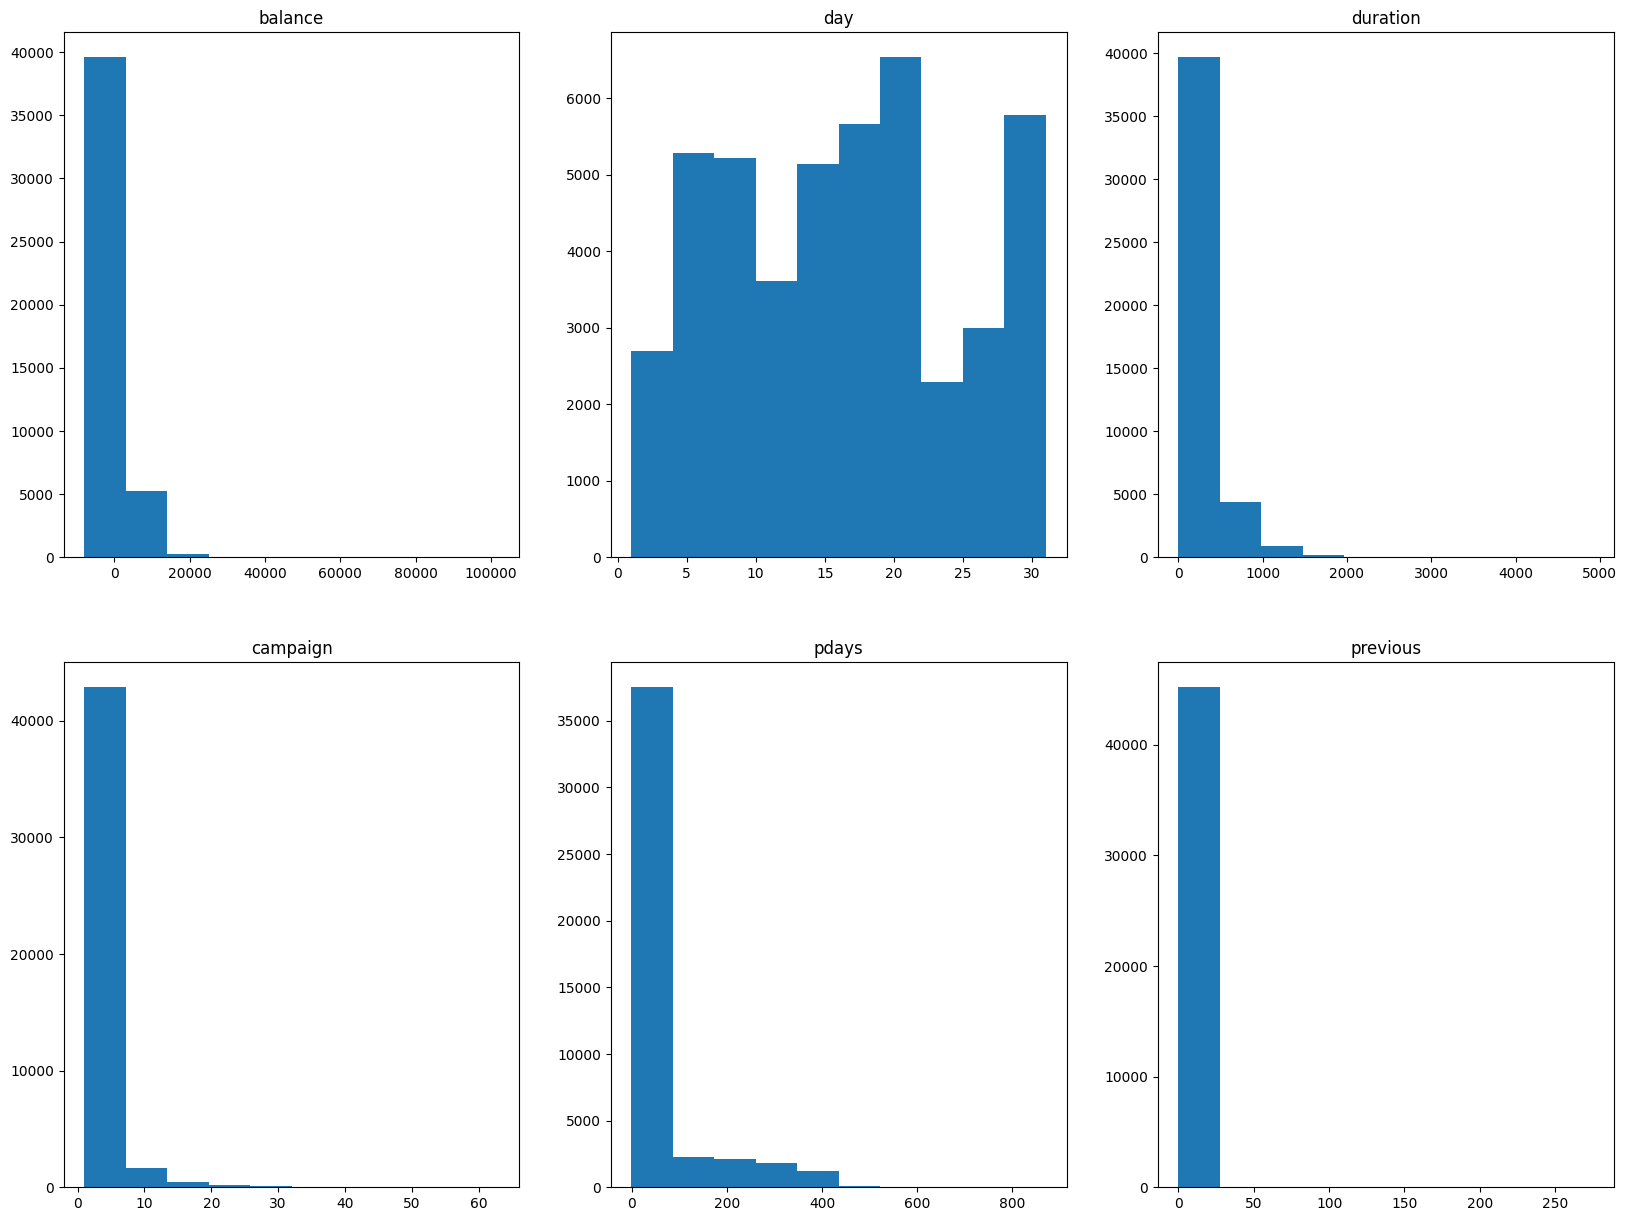

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense, Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:
y = np.array(target)
X = df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, shuffle=True, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((36168, 42), (9043, 42))

In [ ]:
y_test.shape

(9043,)

In [ ]:
X_train_2d=np.expand_dims(X_train,axis=2)
n_timesteps,n_features=X_train_2d.shape[1],X_train_2d.shape[2]

In [ ]:
n_timesteps,n_features

(42, 1)

In [ ]:
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense

model = Sequential()
model.add(LSTM(60, input_shape=(n_timesteps,n_features), return_sequences=True))
model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(5, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(5, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(5, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(5, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(5, kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation="sigmoid"))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.001),metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_2d, y_train,validation_split=0.4,epochs=10,batch_size=1000)

Epoch 1/10
22/22 [==============================] - 29s 947ms/step - loss: 0.6882 - accuracy: 0.8678 - val_loss: 0.6821 - val_accuracy: 0.8824
Epoch 2/10
22/22 [==============================] - 22s 986ms/step - loss: 0.6749 - accuracy: 0.8829 - val_loss: 0.6650 - val_accuracy: 0.8824
Epoch 3/10
22/22 [==============================] - 20s 906ms/step - loss: 0.6513 - accuracy: 0.8829 - val_loss: 0.6315 - val_accuracy: 0.8824
Epoch 4/10
22/22 [==============================] - 25s 1s/step - loss: 0.6059 - accuracy: 0.8829 - val_loss: 0.5701 - val_accuracy: 0.8824
Epoch 5/10
22/22 [==============================] - 22s 985ms/step - loss: 0.5385 - accuracy: 0.8829 - val_loss: 0.4981 - val_accuracy: 0.8824
Epoch 6/10
22/22 [==============================] - 20s 901ms/step - loss: 0.4796 - accuracy: 0.8829 - val_loss: 0.4462 - val_accuracy: 0.8824
Epoch 7/10
22/22 [==============================] - 20s 930ms/step - loss: 0.4442 - accuracy: 0.8829 - val_loss: 0.4154 - val_accuracy: 0.8824
Ep

In [ ]:
from tensorflow import keras

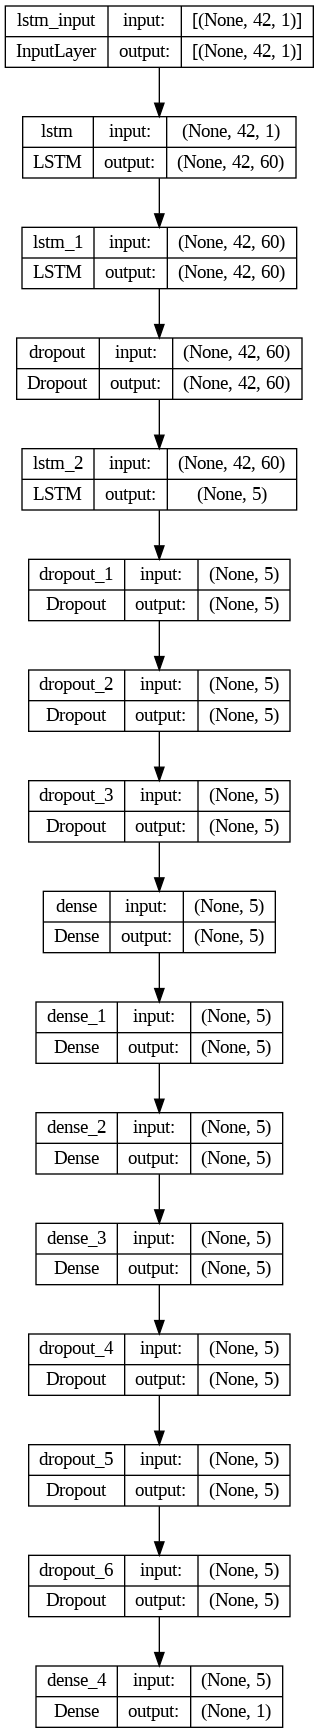

In [ ]:
keras.utils.plot_model(model,to_file='lstm.png',show_shapes=True)

In [ ]:
hist = pd.DataFrame(history.history)

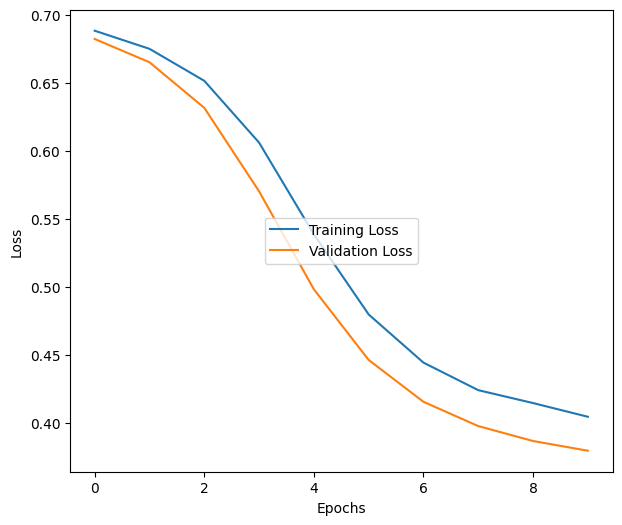

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
hist['loss'].plot(label='Training Loss')
hist['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')
     

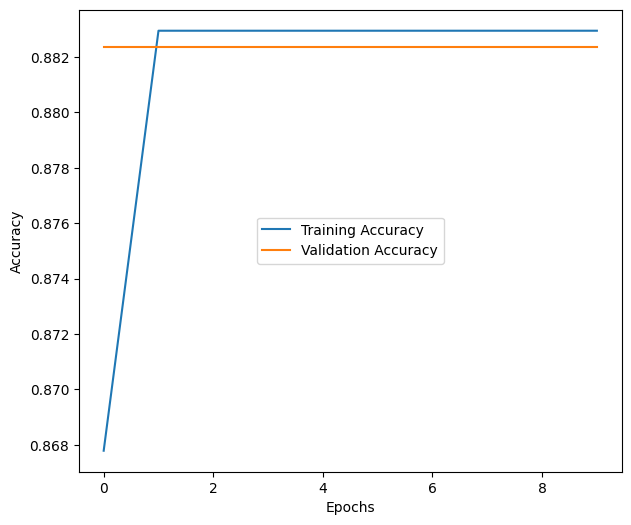

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
hist['accuracy'].plot(label='Training Accuracy')
hist['val_accuracy'].plot(label='Validation Accuracy')
plt.legend(loc='center')


In [ ]:
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

283/283 [==============================] - 8s 24ms/step
rounded test_labels [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
acc = accuracy_score(y_test,preds)
print("Accuracy : ",round(acc*100,2))

Accuracy :  88.42
